## Import packages

In [43]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

Use GPU if it's available

In [44]:
device_name = 'cuda' if torch.cuda.is_available() else 'cpu'
device = torch.device(device_name)

## Set hyperparameters

In [45]:
input_size = 28 * 28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = .001

## Load MNIST dataset

In [46]:
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=False)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=False)


In [47]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


## Plot the data

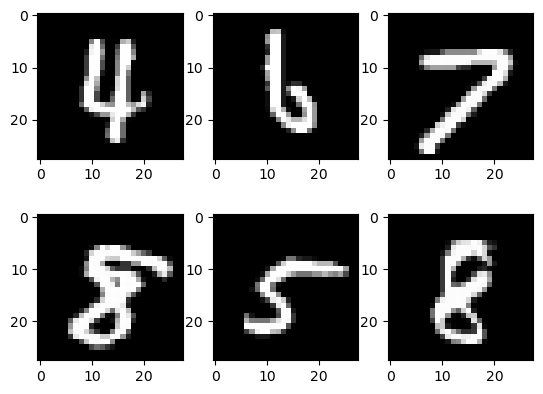

In [48]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')


## Construct our neural network

In [49]:
class HandWrittenClassifier(nn.Module):

    def __init__(self, input_size, hidden_size, num_classes):
        super(HandWrittenClassifier, self).__init__()
        self.linear_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.linear_2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.linear_1(x)
        out = self.relu(out)
        out = self.linear_2(out)
        return out

model = HandWrittenClassifier(input_size, hidden_size, num_classes)


## Define Loss and optimizer

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

## Training loop

In [51]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        #backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i + 1) % 100 == 0:
            print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1}/{n_total_steps}, loss: {loss.item():.4f}')


epoch 1 / 2, step 100/600, loss: 0.3775
epoch 1 / 2, step 200/600, loss: 0.2446
epoch 1 / 2, step 300/600, loss: 0.2308
epoch 1 / 2, step 400/600, loss: 0.1664
epoch 1 / 2, step 500/600, loss: 0.1494
epoch 1 / 2, step 600/600, loss: 0.1741
epoch 2 / 2, step 100/600, loss: 0.1912
epoch 2 / 2, step 200/600, loss: 0.1450
epoch 2 / 2, step 300/600, loss: 0.1464
epoch 2 / 2, step 400/600, loss: 0.0543
epoch 2 / 2, step 500/600, loss: 0.0509
epoch 2 / 2, step 600/600, loss: 0.0966


## Get accuracy on test

In [55]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28 * 28).to(device)
        labels = labels.to(device)
        outputs = model(images)

        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    accuracy = 100 * (n_correct / n_samples)
    print(f"accuracy on test data: {accuracy}%")

accuracy on test data: 97.68166666666667%
